# To predict heart disease
In this Lab, we ask you to apply the Logistic Regression to predict heart disease

### Dataset

* **Sex**: male or female(Nominal)
* **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
* **Current Smoker**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) or not the patient is a current smoker (Nominal)
* **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
* **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)
* **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)
* **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)
* **Diabetes**: whether or not the patient had diabetes (Nominal)
* **Tot Chol**: total cholesterol level (Continuous)
* **Sys BP**: systolic blood pressure (Continuous)
* **Dia BP**: diastolic blood pressure (Continuous)
* **BMI** Body Mass Index (Continuous)
* **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* **Glucose**: glucose level (Continuous)

```Predict variable (desired target```

**10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)**

In [158]:
# imports you libraries
import pandas as pd
import numpy as np
import matplotlib as mp
# your code here
pd.options.display.float_format = "{:.2f}".format

In [159]:
heart_disease = pd.read_csv("framingham.csv") # your code here
heart_disease.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.00,0.00,0,0,0,195.00,106.00,70.00,26.97,80.00,77.00,0
1,0,46,0,0.00,0.00,0,0,0,250.00,121.00,81.00,28.73,95.00,76.00,0
2,1,48,1,20.00,0.00,0,0,0,245.00,127.50,80.00,25.34,75.00,70.00,0
3,0,61,1,30.00,0.00,0,1,0,225.00,150.00,95.00,28.58,65.00,103.00,1
4,0,46,1,23.00,0.00,0,0,0,285.00,130.00,84.00,23.10,85.00,85.00,0


In [160]:
# print some info about the dataframe

# your code here
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


Looks like there are some Nan values, let's see how many for each column

In [161]:
# your code here
heart_disease.isna().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Replace the Nan values

In [162]:
# check the fillna documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html

# replace the NaN values
# your code here
heart_disease["glucose"].fillna(heart_disease["glucose"].mean().round(0), inplace=True)
heart_disease.dropna(inplace=True)
heart_disease.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Visualization

heart disease rate = 0.14946183953033268


<AxesSubplot: title={'center': "Label's Balance"}, xlabel='TenYearCHD'>

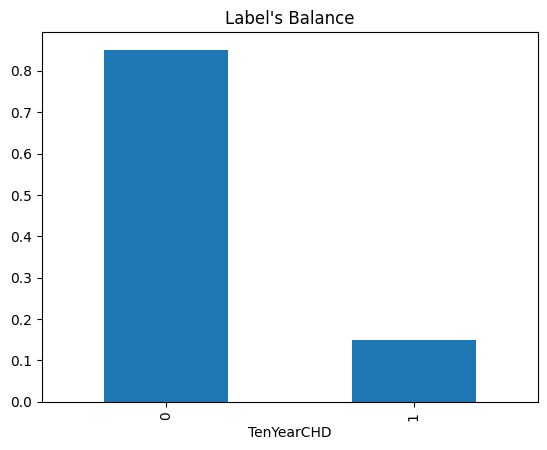

In [163]:
%matplotlib inline
import matplotlib.pyplot as plt
print ('heart disease rate =', heart_disease.TenYearCHD.mean())
(heart_disease.groupby('TenYearCHD').size()/heart_disease.shape[0]).plot(kind="bar",title="Label's Balance")


In [164]:
# make a function to plot survival against passenger attribute
def heart_disease_rate(column,t):
    df=pd.DataFrame()
    df['total']=heart_disease.groupby(column).size()
    df['TenYearCHD'] = heart_disease.groupby(column).sum()['TenYearCHD']
    df['percentage'] = round(df['TenYearCHD']/df['total']*100,2)
    print(df)

    df['TenYearCHD'].plot(kind=t)
    df['total'].plot(kind=t,alpha=0.5,title="TenYearCHD per "+str(column))
    plt.show()

      total  TenYearCHD  percentage
male                               
0      2311         276       11.94
1      1777         335       18.85


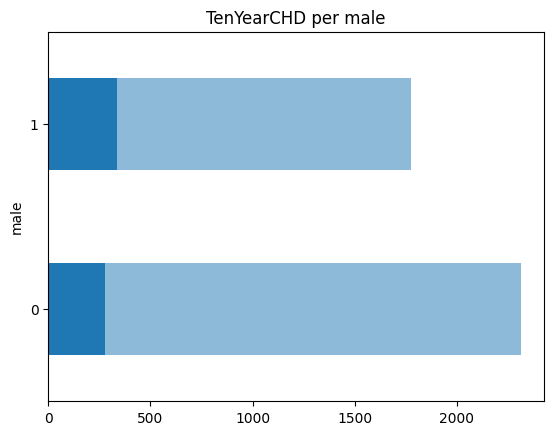

In [165]:
# Draw survival per Sex
heart_disease_rate("male","barh")

            total  TenYearCHD  percentage
cigsPerDay                               
0.00         2084         293       14.06
1.00           66           7       10.61
2.00           17           2       11.76
3.00           93           9        9.68
4.00            9           0        0.00
5.00          121          14       11.57
6.00           17           3       17.65
7.00           12           3       25.00
8.00           10           0        0.00
9.00          124          10        8.06
10.00         140          20       14.29
11.00           5           1       20.00
12.00           3           1       33.33
13.00           3           0        0.00
14.00           2           0        0.00
15.00         206          34       16.50
16.00           3           0        0.00
17.00           7           2       28.57
18.00           7           2       28.57
19.00           2           0        0.00
20.00         714         117       16.39
23.00           6           1     

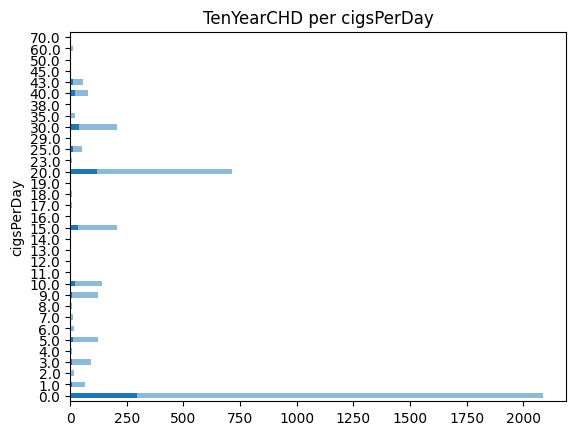

In [166]:
# Draw survival per cigard per day consomation
heart_disease_rate("cigsPerDay","barh")

               total  TenYearCHD  percentage
currentSmoker                               
0               2084         293       14.06
1               2004         318       15.87


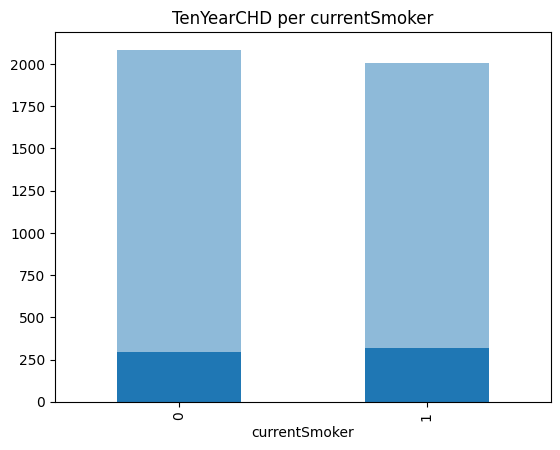

In [167]:
# Graph survived per current Smoker
heart_disease_rate("currentSmoker","bar")

          total  TenYearCHD  percentage
diabetes                               
0          3984         575       14.43
1           104          36       34.62


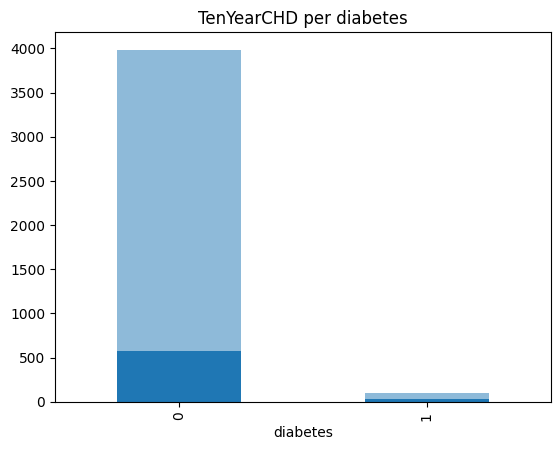

In [168]:
# Draw survived per Number of diabetes
# your code here
heart_disease_rate("diabetes","bar")

              total  TenYearCHD  percentage
prevalentHyp                               
0              2824         305       10.80
1              1264         306       24.21


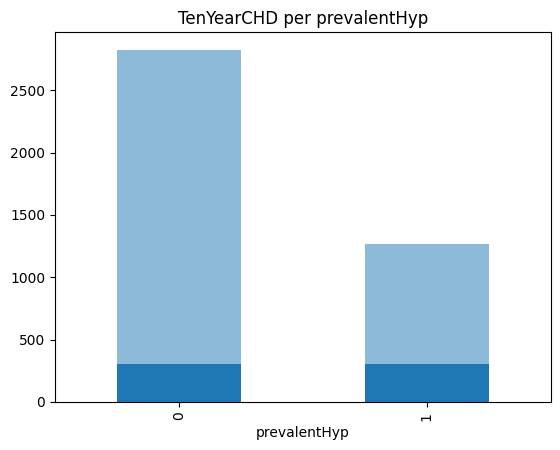

In [169]:
# Draw survived per Number of hypertensive
# your code here
heart_disease_rate("prevalentHyp","bar")

           total  TenYearCHD  percentage
heartRate                               
44.00          1           0        0.00
45.00          2           0        0.00
46.00          1           0        0.00
47.00          1           0        0.00
48.00          5           0        0.00
...          ...         ...         ...
122.00         2           0        0.00
125.00         3           0        0.00
130.00         1           0        0.00
140.00         1           0        0.00
143.00         1           0        0.00

[73 rows x 3 columns]


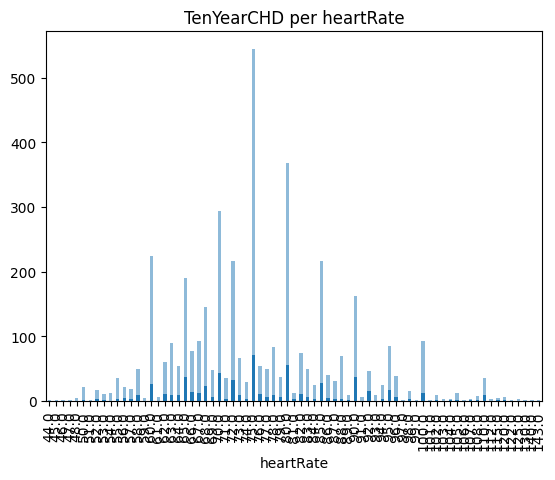

In [174]:
heart_disease_rate("heartRate","bar")

## Model training

In [175]:
#Put only important columns in predictors. You have to find if there is column to remove
predictors = [ "male","age","cigsPerDay","BPMeds","prevalentStroke","prevalentHyp","diabetes","totChol","sysBP","diaBP","BMI","heartRate", "glucose" ]

In [176]:
# Split the data into a training set and a testing set. Set: test_size=0.3, random_state=1
# your code here
from sklearn.model_selection import train_test_split

for col in predictors:
  if (heart_disease[col].dtype == 'object'):
    heart_disease[col] = heart_disease[col].astype('category')
    heart_disease[col] = heart_disease[col].cat.codes

X_train, X_test, y_train, y_test = train_test_split(heart_disease[predictors], heart_disease['TenYearCHD'], test_size=0.3, random_state=1)

print ("train shape", X_train.shape, y_train.shape)
print ("test shape", X_test.shape, y_test.shape)

train shape (2861, 13) (2861,)
test shape (1227, 13) (1227,)


In [186]:
# import LogisticRegression from: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# your code here
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1, max_iter=900)

# fit the model with the training data
clf.fit(X_train, y_train)

train_score = clf.score(X_train, y_train) 
test_score = clf.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.858441104508913
test accuracy = 0.8492257538712307


Let's print the model's parameters

In [187]:
coeff = pd.DataFrame()
coeff['Feature'] = X_train.columns
coeff['Coefficient Estimate'] = pd.Series(clf.coef_[0])
coeff.loc[len(coeff)]=['Intercept',clf.intercept_[0]]
print (coeff)

            Feature  Coefficient Estimate
0              male                  0.59
1               age                  0.07
2        cigsPerDay                  0.02
3            BPMeds                  0.36
4   prevalentStroke                  0.03
5      prevalentHyp                  0.09
6          diabetes                  0.33
7           totChol                  0.00
8             sysBP                  0.01
9             diaBP                 -0.00
10              BMI                  0.01
11        heartRate                  0.00
12          glucose                  0.01
13        Intercept                 -8.81


We now need to predict class labels for the test set. We will also generate the class probabilities

In [191]:
# predict class labels for the test set
y_pred = clf.predict(X_test)
print (y_pred)

[0 0 0 ... 0 0 0]


In [192]:
# generate class probabilities : http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
y_probs = clf.predict_proba(X_test)
print (y_probs)

[[0.78963715 0.21036285]
 [0.78690503 0.21309497]
 [0.91740378 0.08259622]
 ...
 [0.97122384 0.02877616]
 [0.91857502 0.08142498]
 [0.95595787 0.04404213]]


As you can see, the classifier outputs two probabilities for each row. It's predicting a 1 any time the probability in the second column is greater than 0.5. Let's visualize it all together.

In [194]:
pred = pd.DataFrame({        
        "Heart_disease_original": y_test,
        "Heart_disease_predicted": y_pred,
        "Heart_disease_proba": np.transpose(y_probs)[1]      
        })
pred["Comparison"]= pred.Heart_disease_original ==pred.Heart_disease_predicted
pred.head()

,Heart_disease_original,Heart_disease_predicted,Heart_disease_proba,Comparison
1665,0,0,0.21,True
3727,0,0,0.21,True
1813,0,0,0.08,True
2365,0,0,0.03,True
238,1,0,0.11,False


## Confusion matrix

In [198]:
from sklearn import metrics
print (metrics.confusion_matrix(y_test, y_pred))
print (metrics.classification_report(y_test, y_pred))

[[1031   11]
 [ 174   11]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1042
           1       0.50      0.06      0.11       185

    accuracy                           0.85      1227
   macro avg       0.68      0.52      0.51      1227
weighted avg       0.80      0.85      0.80      1227



As you can see, we can have the classification report for each class

## K-Fold Cross Validation

In [203]:
# import cross_validation from: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# your code here
from sklearn import model_selection
clf = LogisticRegression(random_state=1, max_iter=1500)
scores = model_selection.cross_val_score(clf, heart_disease[predictors], heart_disease["TenYearCHD"], scoring='accuracy', cv=5)
## see model 
print(scores)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

[0.85330073 0.85696822 0.84963325 0.86046512 0.85312118]
0.8546976983597334


When you are improving a model, you want to make sur that you are really doing it and not just being lucky. This is why it's good to work with cross validation instead of one train/test split.